# **Data Download**

In [1]:
pip install transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
from datasets import load_dataset

dataset = load_dataset("jakeazcona/short-text-multi-labeled-emotion-classification")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


FINALDATA.csv:   0%|          | 0.00/2.88M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30040 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'sample', 'emotion'],
        num_rows: 30040
    })
})

In [4]:
dataset["train"][0]

{'Unnamed: 0': 0, 'sample': 'i didnt feel humiliated', 'emotion': 5}

In [5]:
train_data = dataset["train"]

In [6]:
train_data

Dataset({
    features: ['Unnamed: 0', 'sample', 'emotion'],
    num_rows: 30040
})

Convert dictionary format into pandas dataframe

In [7]:
import pandas as pd
train_df = pd.DataFrame(train_data)
train_df.head()

,Unnamed: 0,sample,emotion
0,0,i didnt feel humiliated,5
1,1,i can go from feeling so hopeless to so damned...,5
2,2,im grabbing a minute to post i feel greedy wrong,0
3,3,i am ever feeling nostalgic about the fireplac...,3
4,4,i am feeling grouchy,0


In [8]:
train_df.describe()

,Unnamed: 0,emotion
count,30040.00000,30040.000000
mean,15019.50000,2.602730
std,8671.94538,1.731993
min,0.00000,0.000000
25%,7509.75000,1.000000
50%,15019.50000,2.000000
75%,22529.25000,4.000000
max,30039.00000,5.000000


In [9]:
train_df.columns

Index(['Unnamed: 0', 'sample', 'emotion'], dtype='object')

# **Data Preprocessing**

In [10]:
label_0_df = train_df[train_df['emotion'] == 0].head(1500)
label_1_df = train_df[train_df['emotion'] == 1].head(1500)
label_2_df = train_df[train_df['emotion'] == 2].head(1500)
label_3_df = train_df[train_df['emotion'] == 3].head(1500)
label_4_df = train_df[train_df['emotion'] == 4].head(1500)
label_5_df = train_df[train_df['emotion'] == 5].head(5000)

# Concatenate the two DataFrames to create the new DataFrame
train_df = pd.concat([label_0_df, label_1_df,label_2_df, label_3_df,label_4_df, label_5_df])

# Shuffle the new DataFrame to randomize the order of rows
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [11]:
label_counts = train_df['emotion'].value_counts()
print(label_counts)

emotion
5    5000
0    1500
4    1500
2    1500
3    1500
1    1500
Name: count, dtype: int64


In [12]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, XLNetForSequenceClassification, XLNetTokenizer, AlbertForSequenceClassification, AlbertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization using regex (split by whitespace)
    tokens = re.findall(r'\b\w+\b', text)  # Matches words only

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


# **Data Modeling**

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
train_df['sample'] = train_df['sample'].apply(preprocess_text)

In [16]:
train_df.head()

,Unnamed: 0,sample,emotion
0,2697,feel exhausted get workout,5
1,7762,im feeling irritable sick,0
2,11962,feel bit stunned actually,4
3,3992,hope enjoy reading please feel free leave comment,2
4,25090,wow must idea medium exchange mean,4


In [17]:
final_train_df, final_test_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [18]:
model_names = ["bert-base-uncased", "roberta-base", "distilbert-base-uncased",  "xlnet-base-cased", "albert-base-v2"]

In [19]:
import torch
import warnings
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [20]:
results_dict = {}

In [21]:
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
torch.cuda.empty_cache()

batch_size = 4

for model_name in model_names:
    print(f"\nLoading model: {model_name}")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # Convert model to half precision (fp16) and move to GPU
    model.half().to(device)
    model.eval()

    train_texts = final_train_df['sample'].tolist()
    train_labels = torch.tensor(final_train_df['emotion'].tolist(), dtype=torch.long).to(device)

    # Tokenize all training data at once (efficient approach)
    tokenized_train = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")

    # Move tensors to GPU
    input_ids = tokenized_train["input_ids"].to(device)
    attention_mask = tokenized_train["attention_mask"].to(device)

    # Create DataLoader for efficient batch processing
    train_dataset = TensorDataset(input_ids, attention_mask, train_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    predictions = []

    with torch.no_grad():
        for batch in tqdm(train_loader, desc=f"Processing {model_name}"):
            input_ids, attention_mask, _ = batch
            logits = model(input_ids, attention_mask=attention_mask).logits
            batch_predictions = torch.argmax(logits, dim=1).tolist()
            predictions.extend(batch_predictions)

    print(f"\nEvaluating {model_name} on test data...")

    test_texts = final_test_df['sample'].tolist()
    test_labels = torch.tensor(final_test_df['emotion'].tolist(), dtype=torch.long).to(device)
    tokenized_test = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt")

    test_input_ids = tokenized_test["input_ids"].to(device)
    test_attention_mask = tokenized_test["attention_mask"].to(device)

    with torch.no_grad():
        test_logits = model(test_input_ids, attention_mask=test_attention_mask).logits
    test_predictions = torch.argmax(test_logits, dim=1).tolist()

    classification_rep = classification_report(test_labels.cpu().numpy(), test_predictions, output_dict=True)
    accuracy = accuracy_score(test_labels.cpu().numpy(), test_predictions)
    precision_weighted = precision_score(test_labels.cpu().numpy(), test_predictions, average='weighted')
    recall_weighted = recall_score(test_labels.cpu().numpy(), test_predictions, average='weighted')
    f1_weighted = f1_score(test_labels.cpu().numpy(), test_predictions, average='weighted')
    kappa = cohen_kappa_score(test_labels.cpu().numpy(), test_predictions)

    results_dict[model_name] = {
        "classification_report": classification_rep,
        "accuracy": accuracy,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted,
        "cohen_kappa": kappa,
    }

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted): {recall_weighted:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print("=" * 50)


Using device: cuda

Loading model: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bert-base-uncased: 100%|██████████| 2500/2500 [00:24<00:00, 103.42it/s]



Evaluating bert-base-uncased on test data...

Model: bert-base-uncased
Accuracy: 0.1204
Precision (Weighted): 0.0290
Recall (Weighted): 0.1204
F1 Score (Weighted): 0.0419
Cohen's Kappa: 0.0016

Loading model: roberta-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing roberta-base: 100%|██████████| 2500/2500 [00:26<00:00, 95.51it/s]



Evaluating roberta-base on test data...

Model: roberta-base
Accuracy: 0.1156
Precision (Weighted): 0.0134
Recall (Weighted): 0.1156
F1 Score (Weighted): 0.0240
Cohen's Kappa: 0.0000

Loading model: distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing distilbert-base-uncased: 100%|██████████| 2500/2500 [00:14<00:00, 171.91it/s]



Evaluating distilbert-base-uncased on test data...

Model: distilbert-base-uncased
Accuracy: 0.1200
Precision (Weighted): 0.0458
Recall (Weighted): 0.1200
F1 Score (Weighted): 0.0278
Cohen's Kappa: 0.0005

Loading model: xlnet-base-cased


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Processing xlnet-base-cased: 100%|██████████| 2500/2500 [00:51<00:00, 49.02it/s]



Evaluating xlnet-base-cased on test data...

Model: xlnet-base-cased
Accuracy: 0.1136
Precision (Weighted): 0.0194
Recall (Weighted): 0.1136
F1 Score (Weighted): 0.0264
Cohen's Kappa: -0.0024

Loading model: albert-base-v2


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing albert-base-v2: 100%|██████████| 2500/2500 [00:30<00:00, 82.90it/s]



Evaluating albert-base-v2 on test data...

Model: albert-base-v2
Accuracy: 0.1204
Precision (Weighted): 0.0288
Recall (Weighted): 0.1204
F1 Score (Weighted): 0.0425
Cohen's Kappa: 0.0046


In [22]:
results_dict

{'bert-base-uncased': {'classification_report': {'0': {'precision': 0.1282051282051282,
    'recall': 0.17301038062283736,
    'f1-score': 0.14727540500736377,
    'support': 289.0},
   '1': {'precision': 0.11895734597156397,
    'recall': 0.8394648829431438,
    'f1-score': 0.2083852220838522,
    'support': 299.0},
   '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 316.0},
   '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 299.0},
   '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 296.0},
   '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1001.0},
   'accuracy': 0.1204,
   'macro avg': {'precision': 0.041193745696115364,
    'recall': 0.16874587726099688,
    'f1-score': 0.05927677118186933,
    'support': 2500.0},
   'weighted avg': {'precision': 0.029047811398711872,
    'recall': 0.1204,
    'f1-score': 0.04194790938007998,
    'support': 2500.0}},
  'accuracy': 0.1204,
  'precision_weighted': 0.0290478113

In [24]:
# Convert results_dict to a DataFrame
results_df = pd.DataFrame(results_dict).T
results_df = results_df.iloc[:, 1:]
results_df.to_csv('Final_results.csv')
print(results_df)

                        accuracy precision_weighted recall_weighted  \
bert-base-uncased         0.1204           0.029048          0.1204   
roberta-base              0.1156           0.013363          0.1156   
distilbert-base-uncased     0.12           0.045799            0.12   
xlnet-base-cased          0.1136           0.019425          0.1136   
albert-base-v2            0.1204           0.028769          0.1204   

                        f1_weighted cohen_kappa  
bert-base-uncased          0.041948    0.001616  
roberta-base               0.023957         0.0  
distilbert-base-uncased    0.027793    0.000474  
xlnet-base-cased           0.026419   -0.002405  
albert-base-v2             0.042466    0.004579  


# **Apply Topsis**

In [26]:
import numpy as np
import pandas as pd

data = {
    'Model': ['bert-base-uncased', 'roberta-base', 'distilbert-base-uncased', 'xlnet-base-cased', 'albert-base-v2'],
    'accuracy': [0.1272, 0.1268, 0.1264, 0.1296, 0.1204],
    'precision_weighted': [0.029841943, 0.01607824, 0.04145921, 0.036358614, 0.030072913],
    'recall_weighted': [0.1272, 0.1268, 0.1264, 0.1296, 0.1204],
    'f1_weighted': [0.037830229, 0.028537877, 0.038202762, 0.043148697, 0.046722414],
    'cohen_kappa': [0.002165055, 0, 0.001311099, 0.00489431, -0.006785524]
}

df = pd.DataFrame(data)

def normalize(df):
    return df / np.sqrt(np.sum(df**2, axis=0))

normalized_df = normalize(df.drop('Model', axis=1))

weights = np.array([1, 1, 1, 1, 1])
weighted_df = normalized_df * weights

ideal_solution = weighted_df.max(axis=0)
negative_ideal_solution = weighted_df.min(axis=0)

distance_from_ideal = np.sqrt(((weighted_df - ideal_solution) ** 2).sum(axis=1))
distance_from_negative_ideal = np.sqrt(((weighted_df - negative_ideal_solution) ** 2).sum(axis=1))

topsis_score = distance_from_negative_ideal / (distance_from_ideal + distance_from_negative_ideal)

df['Topsis Score'] = topsis_score
df['Rank'] = df['Topsis Score'].rank(ascending=False)

print(df)

                     Model  accuracy  precision_weighted  recall_weighted  \
0        bert-base-uncased    0.1272            0.029842           0.1272   
1             roberta-base    0.1268            0.016078           0.1268   
2  distilbert-base-uncased    0.1264            0.041459           0.1264   
3         xlnet-base-cased    0.1296            0.036359           0.1296   
4           albert-base-v2    0.1204            0.030073           0.1204   

   f1_weighted  cohen_kappa  Topsis Score  Rank  
0     0.037830     0.002165      0.740866   2.0  
1     0.028538     0.000000      0.527886   4.0  
2     0.038203     0.001311      0.703209   3.0  
3     0.043149     0.004894      0.943672   1.0  
4     0.046722    -0.006786      0.174588   5.0  


In [27]:
df.to_csv('answer.csv', index=False)

In [28]:
FinalAnswer = pd.read_csv('answer.csv')

In [29]:
FinalAnswer

,Model,accuracy,precision_weighted,recall_weighted,f1_weighted,cohen_kappa,Topsis Score,Rank
0,bert-base-uncased,0.1272,0.029842,0.1272,0.037830,0.002165,0.740866,2.0
1,roberta-base,0.1268,0.016078,0.1268,0.028538,0.000000,0.527886,4.0
2,distilbert-base-uncased,0.1264,0.041459,0.1264,0.038203,0.001311,0.703209,3.0
3,xlnet-base-cased,0.1296,0.036359,0.1296,0.043149,0.004894,0.943672,1.0
4,albert-base-v2,0.1204,0.030073,0.1204,0.046722,-0.006786,0.174588,5.0


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

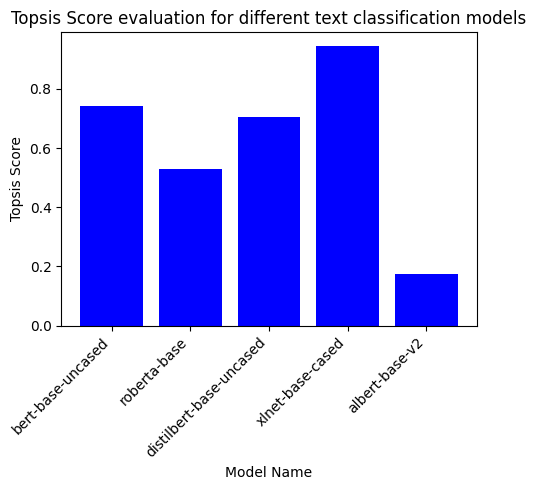

In [31]:
model_names = FinalAnswer['Model']
topsis_scores = FinalAnswer['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Therefore, xlnet-based-cased is the best model foe this data